In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/housing_price.csv")
df.drop('Unnamed: 0', inplace=True, axis=1)

In [29]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [30]:
X = housing['size']

In [31]:
Y = housing['price']

In [32]:
#Task 1 -- X va Y o'zgaruvchilar orqali quyidagilarni topish

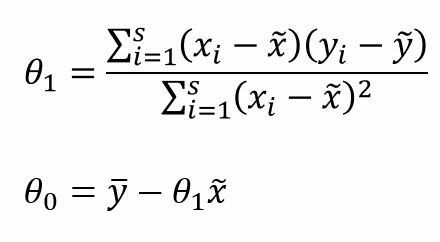

In [33]:
surat = ((X-X.mean())*(Y-Y.mean())).sum()
maxraj = ((X-X.mean())**2).sum()

In [34]:
# Forlumadaga theta(0) belgisini k deb olamiz
k1 = surat/maxraj

In [35]:
k0 = Y.mean()-k1*X.mean()
k0

402.241726175409

In [36]:
# Task 2 -- X dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi y ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

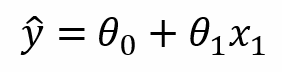

In [37]:
random_x = housing.sample(15, random_state=30)['size']
random_y = housing.sample(15, random_state=30)['price']

In [38]:
y_predicted = k0 + k1*random_x
y_predicted

2622    31044.522937
5204    34692.413557
4160    23748.741696
546     61686.804148
6102    31044.522937
5323    52931.866659
1270    50013.554163
36      52931.866659
1332    77007.944754
2553    37610.726054
6283    45636.085419
66      69712.163513
6917    49283.976039
238     33962.835433
6979    23748.741696
Name: size, dtype: float64

In [39]:
# 3 Task -- Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

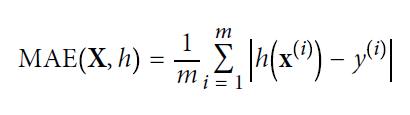

In [40]:
# MAE
np.sum(np.abs(random_y-y_predicted))/len(random_y)

8510.105618373207

In [41]:
# RMSE
np.sqrt(np.sum((random_y-y_predicted)**2)/len(random_y))

11170.515366761516

## **Yuqoridagilarni SKLEARN yordamida osongina qilamiz**

In [42]:
housing.shape


(1614, 6)

In [50]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=43)

In [51]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()


x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

In [52]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [53]:
# Kofitsent va ozod hadni ya'ni theta1 va theta0 larni bilish mn
k1 = LR_model.coef_[0][0] # Bu matrix qaytargani uchun shunday tanladik
k0 = LR_model.intercept_[0]
print(f'k1 = {k1}')
print(f'k0= {k0}')

k1 = 720.8641366459483
k0= 931.4470748162566


**Modelni baholaymiz**

In [54]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [55]:
y_predicted = LR_model.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_predicted)
RMSE = np.sqrt(mean_squared_error(y_test,y_predicted))

print(f'MAE={MAE}')
print(f"RMSE={RMSE}")

MAE=7893.866582849112
RMSE=14191.31785098887
